# 

## 

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.DataFrame({
    'x0':[1,2,3,4,5],
    'x1':[0.01,-0.01,0.25,-4.1,0.],
    'y':[-1.5,0.,3.6,1.3,-2.1]
})

In [3]:
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.1


In [4]:
data.columns

Index(['x0', 'x1', 'y'], dtype='object')

In [5]:
data.values

array([[ 1.  ,  0.01, -1.5 ],
       [ 2.  , -0.01,  0.  ],
       [ 3.  ,  0.25,  3.6 ],
       [ 4.  , -4.1 ,  1.3 ],
       [ 5.  ,  0.  , -2.1 ]])

In [6]:
df2 = pd.DataFrame(data.values,columns=['one','two','three'])

In [7]:
df2

,one,two,three
0,1.0,0.01,-1.5
1,2.0,-0.01,0.0
2,3.0,0.25,3.6
3,4.0,-4.10,1.3
4,5.0,0.00,-2.1


In [8]:
df3 = data.copy()

In [9]:
df3['strings'] = ['a','b','c','d','e']

In [10]:
df3

,x0,x1,y,strings
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,c
3,4,-4.10,1.3,d
4,5,0.00,-2.1,e


In [11]:
df3.values

array([[1, 0.01, -1.5, 'a'],
       [2, -0.01, 0.0, 'b'],
       [3, 0.25, 3.6, 'c'],
       [4, -4.1, 1.3, 'd'],
       [5, 0.0, -2.1, 'e']], dtype=object)

In [12]:
model_cols = ['x0','x1']

In [13]:
data.loc[:,model_cols].values

array([[ 1.  ,  0.01],
       [ 2.  , -0.01],
       [ 3.  ,  0.25],
       [ 4.  , -4.1 ],
       [ 5.  ,  0.  ]])

In [14]:
data['category'] = pd.Categorical(['a','b','a','a','b'],categories=['a','b'])

In [15]:
data

,x0,x1,y,category
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,a
3,4,-4.10,1.3,a
4,5,0.00,-2.1,b


In [16]:
dummies = pd.get_dummies(data.category,prefix='category')

In [17]:
data_with_dummies= data.drop('category',axis=1).join(dummies)

In [18]:
data_with_dummies

,x0,x1,y,category_a,category_b
0,1,0.01,-1.5,1,0
1,2,-0.01,0.0,0,1
2,3,0.25,3.6,1,0
3,4,-4.10,1.3,1,0
4,5,0.00,-2.1,0,1


## 使用Patsy创建模型描述

In [19]:
data = pd.DataFrame({
    'x0':[1,2,3,4,5],
    'x1':[0.01,-0.01,0.25,-4.1,0.],
    'y':[-1.5,0.,3.6,1.3,-2.1]
})

In [20]:
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.1


In [24]:
import patsy

In [25]:
y,X = patsy.dmatrices('y~x0 + x1',data)

In [26]:
y

DesignMatrix with shape (5, 1)
     y
  -1.5
   0.0
   3.6
   1.3
  -2.1
  Terms:
    'y' (column 0)

In [27]:
X

DesignMatrix with shape (5, 3)
  Intercept  x0     x1
          1   1   0.01
          1   2  -0.01
          1   3   0.25
          1   4  -4.10
          1   5   0.00
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'x1' (column 2)

In [28]:
np.asarray(y)

array([[-1.5],
       [ 0. ],
       [ 3.6],
       [ 1.3],
       [-2.1]])

In [29]:
np.asarray(X)

array([[ 1.  ,  1.  ,  0.01],
       [ 1.  ,  2.  , -0.01],
       [ 1.  ,  3.  ,  0.25],
       [ 1.  ,  4.  , -4.1 ],
       [ 1.  ,  5.  ,  0.  ]])

In [32]:
patsy.dmatrices('y~x0 + x1 +0',data)[1]

DesignMatrix with shape (5, 2)
  x0     x1
   1   0.01
   2  -0.01
   3   0.25
   4  -4.10
   5   0.00
  Terms:
    'x0' (column 0)
    'x1' (column 1)

In [33]:
coef,resid,_,_ = np.linalg.lstsq(X,y)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [34]:
coef

array([[ 0.35894214],
       [-0.10446052],
       [-0.27849274]])

In [35]:
coef = pd.Series(coef.squeeze(),index=X.design_info.column_names)

In [36]:
coef

Intercept    0.358942
x0          -0.104461
x1          -0.278493
dtype: float64

In [37]:
y,X = patsy.dmatrices('y~ x0 + np.log(np.abs(x1)+1)',data)

In [38]:
X

DesignMatrix with shape (5, 3)
  Intercept  x0  np.log(np.abs(x1) + 1)
          1   1                 0.00995
          1   2                 0.00995
          1   3                 0.22314
          1   4                 1.62924
          1   5                 0.00000
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'np.log(np.abs(x1) + 1)' (column 2)

In [39]:
y,X = patsy.dmatrices('y~standardize(x0)+center(x1)',data)

In [40]:
X

DesignMatrix with shape (5, 3)
  Intercept  standardize(x0)  center(x1)
          1         -1.41421        0.78
          1         -0.70711        0.76
          1          0.00000        1.02
          1          0.70711       -3.33
          1          1.41421        0.77
  Terms:
    'Intercept' (column 0)
    'standardize(x0)' (column 1)
    'center(x1)' (column 2)

- 分类数据与Patsy

In [41]:
data = pd.DataFrame({
    'key1':list('aabbabab'),
    'key2':[0,1,0,1,0,1,0,0],
    'v1':[1,2,3,4,5,6,7,8],
    'v2':[-1,0,2.5,-0.5,4.0,-1.2,0.2,-1.7]
})

In [42]:
y,X = patsy.dmatrices('v2~key1',data)

In [43]:
X

DesignMatrix with shape (8, 2)
  Intercept  key1[T.b]
          1          0
          1          0
          1          1
          1          1
          1          0
          1          1
          1          0
          1          1
  Terms:
    'Intercept' (column 0)
    'key1' (column 1)

In [44]:
y,X = patsy.dmatrices('v2~key1+0',data)

In [45]:
X

DesignMatrix with shape (8, 2)
  key1[a]  key1[b]
        1        0
        1        0
        0        1
        0        1
        1        0
        0        1
        1        0
        0        1
  Terms:
    'key1' (columns 0:2)

In [47]:
y,X = patsy.dmatrices('v2~C(key2)',data)

In [48]:
X

DesignMatrix with shape (8, 2)
  Intercept  C(key2)[T.1]
          1             0
          1             1
          1             0
          1             1
          1             0
          1             1
          1             0
          1             0
  Terms:
    'Intercept' (column 0)
    'C(key2)' (column 1)

In [49]:
data['key2'] = data['key2'].map({0:'zer0',1:'one'})

In [50]:
data

,key1,key2,v1,v2
0,a,zer0,1,-1.0
1,a,one,2,0.0
2,b,zer0,3,2.5
3,b,one,4,-0.5
4,a,zer0,5,4.0
5,b,one,6,-1.2
6,a,zer0,7,0.2
7,b,zer0,8,-1.7


In [51]:
y,X = patsy.dmatrices('v2~key1+key2',data)

In [52]:
X

DesignMatrix with shape (8, 3)
  Intercept  key1[T.b]  key2[T.zer0]
          1          0             1
          1          0             0
          1          1             1
          1          1             0
          1          0             1
          1          1             0
          1          0             1
          1          1             1
  Terms:
    'Intercept' (column 0)
    'key1' (column 1)
    'key2' (column 2)

In [53]:
y,X = patsy.dmatrices('v2~key1+key2+key1:key2',data)

In [54]:
X

DesignMatrix with shape (8, 4)
  Intercept  key1[T.b]  key2[T.zer0]  key1[T.b]:key2[T.zer0]
          1          0             1                       0
          1          0             0                       0
          1          1             1                       1
          1          1             0                       0
          1          0             1                       0
          1          1             0                       0
          1          0             1                       0
          1          1             1                       1
  Terms:
    'Intercept' (column 0)
    'key1' (column 1)
    'key2' (column 2)
    'key1:key2' (column 3)

## statsmodels介绍

- 评估线性模型

In [56]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [63]:
def dnorm(mean,variance,size=1):
    if isinstance(size,int):
        size =size
    return mean + np.sqrt(variance)*np.random.randn(*size)

In [69]:
np.random.seed(12345)
N=100

In [ ]:
X = np.c_[dnorm(0,0.4,size=N),
         dnorm(0,0.6,size=N),
          dnorm(0,0.2,size=N)]
eps = dnorm(0,0.1,size=N)
beta = [0.1,0.3,0.5]
y=np.dot(X,beta)+eps

- 评估时间序列处理

In [71]:
init_x = 4

In [72]:
import random

In [73]:
values = [init_x,init_x]

In [74]:
N = 1000

In [ ]:
b0 = 0.8
b1 = -0.4
noise = dnorm(0,0.1,N)

In [ ]:
for i in rane(N):
    new_x = values[-1]*b0 + values[-2]*b1 + noise[i]
    values.append(new_x)

In [ ]:
MAXLAGS = 5
model  = sm.tsa.AR(values)
results = model.fit(MAXLAGS)
results.params

## scikit-learn介绍

In [76]:
train = pd.read_csv('train.csv')

In [77]:
test = pd.read_csv('test.csv')

In [78]:
train[:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [79]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [80]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [81]:
impute_value = train['Age'].median()

In [82]:
train['Age'] = train['Age'].fillna(impute_value)

In [83]:
test['Age'] = train['Age'].fillna(impute_value)

In [84]:
train['IsFemale'] = (train['Sex'] == 'female').astype(int)

In [89]:
test['IsFemale'] = (test['Sex'] == 'female').astype(int)

In [86]:
predictors = ['Pclass','IsFemale','Age']

In [87]:
X_train = train[predictors].values

In [90]:
X_test = test[predictors].values

In [91]:
y_train = train['Survived'].values

In [92]:
X_train[:5]

array([[ 3.,  0., 22.],
       [ 1.,  1., 38.],
       [ 3.,  1., 26.],
       [ 1.,  1., 35.],
       [ 3.,  0., 35.]])

In [93]:
y_train[:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
model = LogisticRegression()

In [97]:
model.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [98]:
y_predict = model.predict(X_test)

In [99]:
y_predict[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [100]:
from sklearn.linear_model import LogisticRegressionCV

In [101]:
model_cv = LogisticRegressionCV(10)

In [102]:
model_cv.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [103]:
from sklearn.model_selection import  cross_val_score

In [104]:
model = LogisticRegression(C=10)

In [105]:
scores = cross_val_score(model,X_train,y_train,cv=4)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [106]:
scores

array([0.77232143, 0.80269058, 0.77027027, 0.78828829])

# 第14章 数据分析示例

## 从Bitly获取1.USA.gov数据

In [107]:
path = 'example.txt'

In [108]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [109]:
import json

In [110]:
records = [json.loads(line) for line in open(path)]

In [111]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

- 纯Python时区计数

In [112]:
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

In [113]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [114]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

- 使用pandas进行时区计数 

In [115]:
frame = pd.DataFrame(records)

In [116]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [117]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [119]:
tz_counts = frame['tz'].value_counts()

In [120]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [121]:
clean_tz= frame['tz'].fillna('Missing')

In [122]:
clean_tz[clean_tz == '']='Unknown'

In [123]:
tz_counts = clean_tz.value_counts()

In [124]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [125]:
import seaborn as sns

In [128]:
subset =tz_counts[:10]

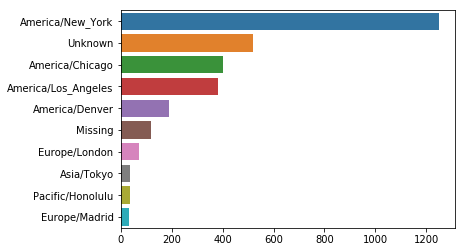

In [129]:
sns.barplot(y=subset.index,x=subset.values)

In [130]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [131]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [132]:
frame['a'][51][:50]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [134]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])

In [135]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [136]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [137]:
cframe = frame[frame.a.notnull()]

In [138]:
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),'Windows','Not Windows')

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [139]:
cframe['os'][:5]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [140]:
by_tz_os = cframe.groupby(['tz','os'])

In [141]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [142]:
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [143]:
inderxer = agg_counts.sum(1).argsort()

In [144]:
inderxer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [145]:
count_subset = agg_counts.take(inderxer[-10:])

In [146]:
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [147]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [148]:
count_subset = count_subset.stack()

In [149]:
count_subset.name = 'total'

In [150]:
count_subset = count_subset.reset_index()

In [151]:
count_subset[:10]

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


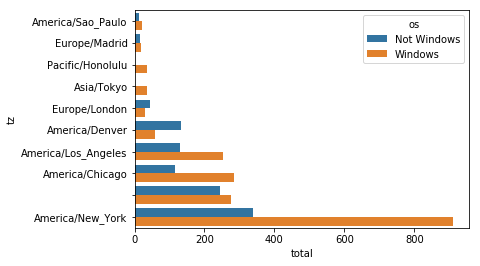

In [152]:
sns.barplot(x='total',y='tz',hue='os',data=count_subset)

In [153]:
def norm_total(group):
    group['normed_total']=group.total/group.total.sum()
    return group

In [154]:
results = count_subset.groupby('tz').apply(norm_total)

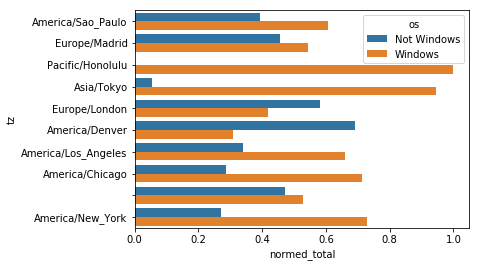

In [155]:
sns.barplot(x='normed_total',y='tz',hue='os',data=results)

## MovieLens 1M数据集

In [157]:
import pandas as pd
import os
# 读取三个文档 
unames = ['user_id','gender','age','occupation','zip' ]
users =  pd.read_table(r'users.dat',sep='::',header=None,names=unames,engine = 'python')
rnames = ['user_id','movie_id','rating','timestamp']
ratings = pd.read_table(r'ratings.dat',sep='::',header=None,names=rnames,engine = 'python')
mnames = ['movie_id','title','genres']
movies = pd.read_table(r'movies.dat',sep='::+',header=None,names=mnames,engine = 'python')

# 先通过user_id 将ratings表和users表合并，再通过movie_id将movies表与刚刚合并的表合并
data = pd.merge(pd.merge(ratings,users),movies)

# 按性别统计每部电影的平均评分
mean_ratings = data.pivot_table('rating',index='title',columns='gender',aggfunc='mean')

# size()获取一个元素为各分组大小的Series
ratings_by_title = data.groupby('title').size()

# 获得评分数量大于等于250个的电影的标题
active_titles = ratings_by_title.index[ratings_by_title>=250]

# 筛选出评分数量大于等于250个的电影的平均评分
mean_ratings = mean_ratings.loc[active_titles]

# 为了获得女性评分的top电影，我们将数据透视表按照女性性别F进行降序排列
top_female_ratings = mean_ratings.sort_values(by='F',ascending=False)

# 计算男女对同一部电影评分均值的差异，并按照差异值升序排序
mean_ratings['diff'] = mean_ratings['M']-mean_ratings['F']
sorted_by_diff = mean_ratings.sort_values(by='diff')

# 查看女性更喜欢而男性评分不高的电影
sorted_by_diff[:10]

# 先将数据按行倒序，再选出前十行，以查看男性更喜欢而女性评分不高的电影
sorted_by_diff[::-1][:10]

# 获取按标题分组的电影评分的标准差
rating_std_by_title = data.groupby('title')['rating'].std()
# 筛选出评分数量大于等于250个的电影评分的标准差
rating_std_by_title = rating_std_by_title.loc[active_titles]
# 筛选出电影评分在观众中异议最大的电影
rating_std_by_title.sort_values(ascending=False)[:10]


title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

## 美国1880~2010年的婴儿名字

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F11ED9ADD8>,
      dtype=object)

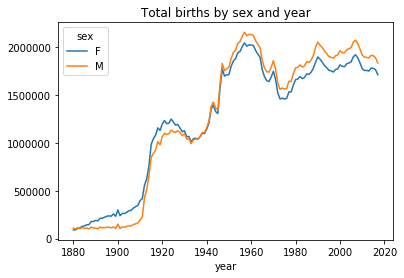

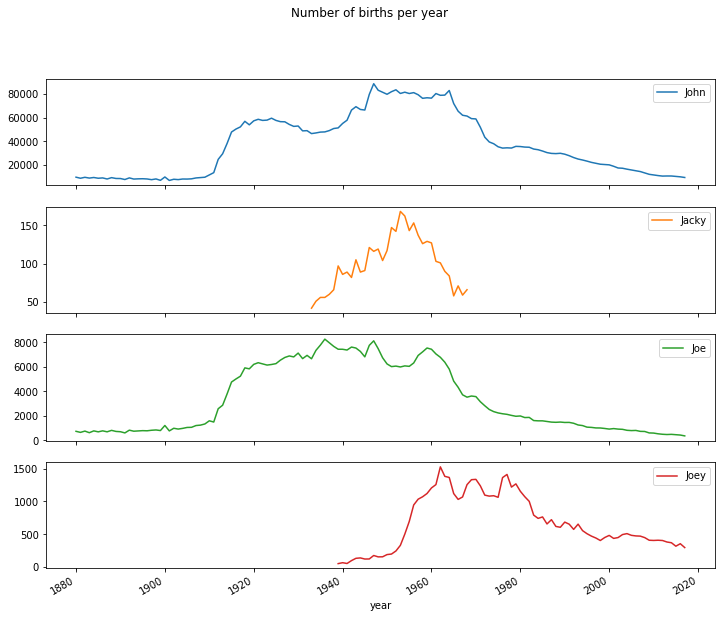

In [159]:
# 修改读取文件的路径
path = 'C:\\Users\\youlanad\\Desktop\\A_py_code\\names'
os.chdir(path)

# 批量读取文件
years = range(1880,2018)
pieces = []
columns = ['name','sex','births']
for year in years:
    path = 'yob%d.txt' % year
    frame = pd.read_csv(path,names=columns)
    frame['year'] = year
    pieces.append(frame)

# 将所有的内容放进一个dataframe
names = pd.concat(pieces,ignore_index=True)

# 按性别和年份划分的出生总数
total_births = names.pivot_table('births',index='year',columns='sex',aggfunc='sum')


total_births.plot(title='Total births by sex and year')

# 创建一个添加prop列，以计算每个名字按照年份、性别的占比
def add_prop(group):
    group['prop']=group.births/group.births.sum()
    return group

names = names.groupby(['year','sex']).apply(add_prop)

# 验证所有组的prop列总计为1
names.groupby(['year','sex']).prop.sum()

# 创建一个筛选出生数前1000名
def get_top1000(group):
    return group.sort_values(by='births',ascending=False)[:1000]


grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)
top1000.reset_index(inplace=True,drop=True)

# 将top1000里的男孩和女孩分开
boys = top1000[top1000.sex=='M']
girls = top1000[top1000.sex=='F']

# 查找2017年出生的top1000的男孩名
top1000.query('year==2017 & sex=="M"')


total_births = top1000.pivot_table('births',index='year',columns='name',aggfunc=sum)

subset =total_births[['John','Jacky','Joe','Joey']]
subset.plot(subplots=True,figsize=(12,10),grid=False,title='Number of births per year')


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F11FD535F8>,
      dtype=object)

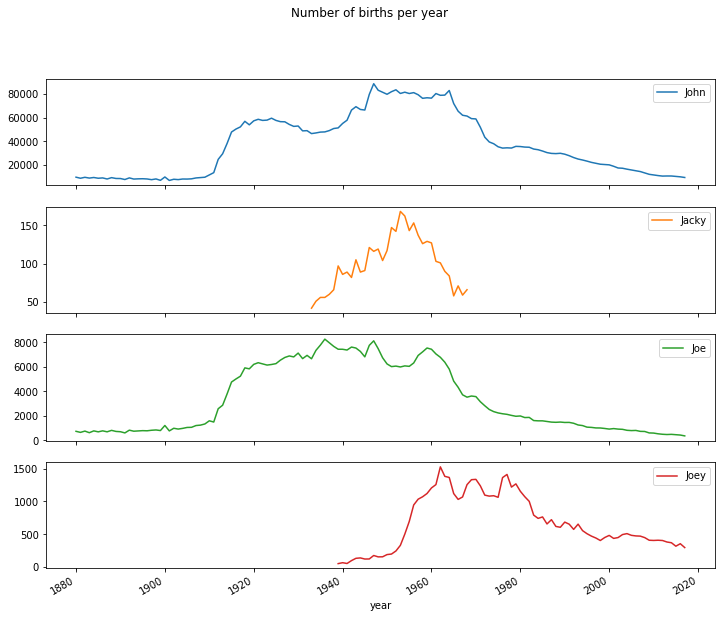

In [160]:
subset.plot(subplots=True,figsize=(12,10),grid=False,title='Number of births per year')

In [161]:
table = top1000.pivot_table('prop',index='year',columns='sex',aggfunc=sum)

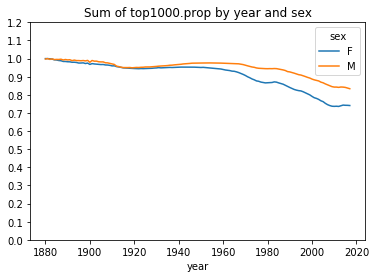

In [162]:
# 查看top1000的名字覆盖的范围
figsize = (12,4)
table.plot(title='Sum of top1000.prop by year and sex',yticks=np.linspace(0,1.2,13),)


In [163]:
# 筛选2017年的top1000男孩名
df = boys[boys.year==2017]

In [164]:
# 按照 prop列求累计总和
prop_cumsum = df.sort_values(by='prop',ascending=False).prop.cumsum()

In [165]:
# 查找累积和为0.5的位置
prop_cumsum.values.searchsorted(0.5)

142

In [166]:
def get_quantile_count(group,q=0.5):
    group = group.sort_values(by='prop',ascending=False)
    return group.prop.cumsum().values.searchsorted(q)+1

In [167]:
diversity =top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity

year  sex
1880  F       38
      M       14
1881  F       38
      M       14
1882  F       38
      M       15
1883  F       39
      M       15
1884  F       39
      M       16
1885  F       40
      M       16
1886  F       41
      M       16
1887  F       41
      M       17
1888  F       42
      M       17
1889  F       43
      M       18
1890  F       44
      M       19
1891  F       44
      M       20
1892  F       44
      M       20
1893  F       44
      M       21
1894  F       45
      M       22
            ... 
2003  F      179
      M       87
2004  F      191
      M       92
2005  F      199
      M       96
2006  F      209
      M       99
2007  F      223
      M      103
2008  F      234
      M      109
2009  F      241
      M      114
2010  F      246
      M      117
2011  F      244
      M      120
2012  F      248
      M      124
2013  F      241
      M      126
2014  F      242
      M      131
2015  F      243
      M      135
2016  F      249
    

In [168]:
diversity = diversity.unstack('sex')

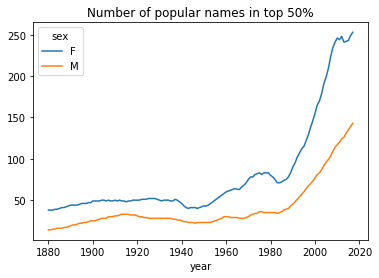

In [169]:
diversity.plot(title='Number of popular names in top 50%')

- 从图中可以看出名字越来越多样化
- 女孩的名字一直比男孩的更多样化

In [170]:
# 从name列提取最后一个字母
get_last_letter = lambda x:x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

In [171]:
last_letters.head()

0    y
1    a
2    a
3    h
4    e
Name: last_letter, dtype: object

In [172]:
table = names.pivot_table('births',index=last_letters,columns=['sex','year'],aggfunc=sum)

In [173]:
subtable = table.reindex(columns=[1910,1960,2015],level='year')

In [174]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2015     1910      1960      2015
last_letter                                                           
a            108397.0  691250.0  659755.0    977.0    5212.0   28952.0
b                 NaN     694.0     596.0    411.0    3914.0   29557.0
c                 5.0      49.0    1253.0    482.0   15460.0   23106.0
d              6751.0    3730.0    3251.0  22113.0  262136.0   43717.0
e            133600.0  435043.0  326665.0  28665.0  178785.0  128384.0

In [175]:
subtable.sum()

sex  year
F    1910     396502.0
     1960    2022018.0
     2015    1778883.0
M    1910     194213.0
     1960    2132359.0
     2015    1909804.0
dtype: float64

In [176]:
letter_prop = subtable/subtable.sum()

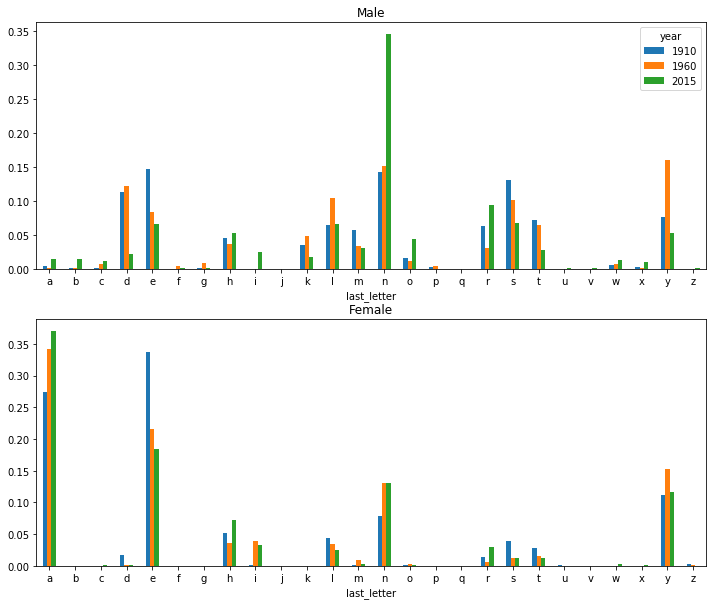

In [177]:
fig,axes = plt.subplots(2,1,figsize=(12,10))
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[0],title='Male')
letter_prop['F'].plot(kind='bar',rot=0,ax=axes[1],title='Female',legend=False)

In [178]:
letter_prop =  table/table.sum()

In [179]:
dny_ts = letter_prop.loc[['d','n','y'],'M'].T

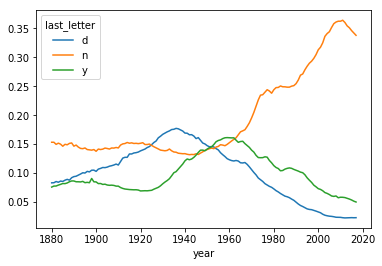

In [180]:
dny_ts.plot()

In [181]:
all_names = pd.Series(top1000.name.unique())

In [182]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]

In [183]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [184]:
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35032
Lesli        929
Leslie    377561
Lesly      11432
Name: births, dtype: int64

In [185]:
table = filtered.pivot_table('births',index='year',columns='sex',aggfunc=sum)

In [188]:
table = table.div(table.sum(1),axis=0)

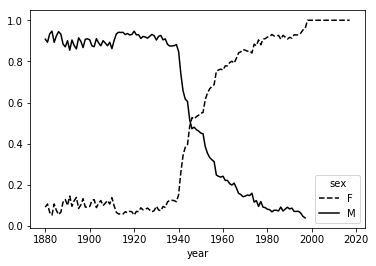

In [189]:
table.plot(style={'M':'k-','F':'k--'})

##  美国农业部食品数据库

In [190]:
import json 

In [194]:
db = json.load(open('database.json'))

In [195]:
len(db)

6636

In [196]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [197]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [211]:
nutrients = pd.DataFrame(db[0]['nutrients'])

In [215]:
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [216]:
info_keys = ['description','group','id','manufacturer']

In [217]:
info =  pd.DataFrame(db,columns = info_keys)

In [218]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [219]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
description     6636 non-null object
group           6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [220]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Pork Products                        328
Fruits and Fruit Juices              328
Name: group, dtype: int64

## 2012年联邦选举委员会数据库

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fec = pd.read_csv('P00000001-ALL.csv')

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [5]:
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [6]:
unique_cands = fec.cand_nm.unique()

In [7]:
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [8]:
unique_cands[2]

'Obama, Barack'

In [9]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [10]:
fec['party'] = fec.cand_nm.map(parties)

In [11]:
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [12]:
fec = fec[fec.contb_receipt_amt>0]

In [36]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack','Romney, Mitt'])]

In [13]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [14]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}

In [15]:
f = lambda x:occ_mapping.get(x,x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [16]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

In [17]:
f = lambda x:emp_mapping.get(x,x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [18]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                               index='contbr_occupation',
                               columns='party',aggfunc='sum')

In [19]:
over_2mm = by_occupation[by_occupation.sum(1)>2000000]

In [20]:
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05
MANAGER,762883.22,1.444532e+06


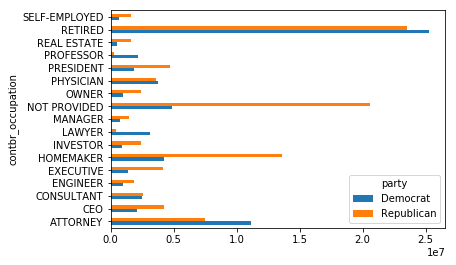

In [23]:
over_2mm.plot(kind='barh')

In [30]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

In [38]:
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation
Obama, Barack  RETIRED              25305116.38
               ATTORNEY             11141982.97
               NOT PROVIDED          4866973.96
               HOMEMAKER             4248875.80
               PHYSICIAN             3735124.94
               LAWYER                3160478.87
               CONSULTANT            2459912.71
Romney, Mitt   RETIRED              11508473.59
               NOT PROVIDED         11396894.84
               HOMEMAKER             8147446.22
               ATTORNEY              5364718.82
               PRESIDENT             2491244.89
               CEO                   2324297.03
               EXECUTIVE             2300947.03
Name: contb_receipt_amt, dtype: float64

In [39]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer   
Obama, Barack  RETIRED               22694358.85
               SELF-EMPLOYED         18626807.16
               NOT EMPLOYED           8586308.70
               NOT PROVIDED           5053480.37
               HOMEMAKER              2605408.54
               STUDENT                 318831.45
               VOLUNTEER               257104.00
               MICROSOFT               215585.36
               SIDLEY AUSTIN LLP       168254.00
               REFUSED                 149516.07
Romney, Mitt   NOT PROVIDED          12059527.24
               RETIRED               11506225.71
               HOMEMAKER              8147196.22
               SELF-EMPLOYED          7414115.22
               STUDENT                 496490.94
               CREDIT SUISSE           281150.00
               MORGAN STANLEY          267266.00
               GOLDMAN SACH & CO.      238250.00
               BARCLAYS CAPITAL        162750.00
               H.I.G. CAPITAL      

- 捐赠金额分桶

In [26]:
bins = np.array([0,1,10,100,1000,10000,100000,1000000,10000000])

In [40]:
labels = pd.cut(fec_mrbo.contb_receipt_amt,bins)

In [41]:
labels

411           (10, 100]
412         (100, 1000]
413         (100, 1000]
414           (10, 100]
415           (10, 100]
416           (10, 100]
417         (100, 1000]
418           (10, 100]
419         (100, 1000]
420           (10, 100]
421           (10, 100]
422         (100, 1000]
423         (100, 1000]
424         (100, 1000]
425         (100, 1000]
426         (100, 1000]
427       (1000, 10000]
428         (100, 1000]
429         (100, 1000]
430           (10, 100]
431       (1000, 10000]
432         (100, 1000]
433         (100, 1000]
434         (100, 1000]
435         (100, 1000]
436         (100, 1000]
437           (10, 100]
438         (100, 1000]
439         (100, 1000]
440           (10, 100]
              ...      
701356        (10, 100]
701357          (1, 10]
701358        (10, 100]
701359        (10, 100]
701360        (10, 100]
701361        (10, 100]
701362      (100, 1000]
701363        (10, 100]
701364        (10, 100]
701365        (10, 100]
701366        (1

In [42]:
grouped = fec_mrbo.groupby(['cand_nm',labels])

In [43]:
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [44]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)

In [45]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1),axis=0)

In [46]:
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


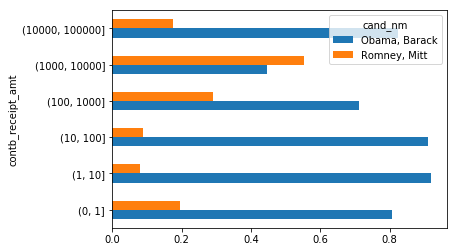

In [47]:
normed_sums[:-2].plot(kind='barh')

- 按洲进行捐赠统计

In [48]:
grouped = fec_mrbo.groupby(['cand_nm','contbr_st'])

In [49]:
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)

In [50]:
totals = totals[totals.sum(1)>100000]

In [51]:
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [52]:
percent = totals.div(totals.sum(1),axis=0)

In [53]:
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224
